In [2]:
#Importo as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Importa os dados do arquivo CSV e monta o DataFrame com a Base de Dados dos combustíveis automotivos do 1º semestre de 2025
#https://dados.gov.br/dados/conjuntos-dados/serie-historica-de-precos-de-combustiveis-e-de-glp
#1o. Sem 2025 - Combustíveis Automotivos
dfBD = pd.read_csv("Preços semestrais - AUTOMOTIVOS_2025.01.csv", delimiter=";")
dfBD.head(2)

C:\Users\Paulo Monteiro Jr\AppData\Local\Temp\ipykernel_19808\3989438415.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  dfBD = pd.read_csv("Preços semestrais - AUTOMOTIVOS_2025.01.csv", delimiter=";")


,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,CE,SOBRAL,ECONOGÁS DO BRASIL DIST. DERIV. DE PET. BIOC. ...,08.775.979/0002-62,RUA TABELIÃO IDELFONSO CAVALCANTI,455,NaN,CENTRO,62010-000,GASOLINA,01/01/2025,"6,29",NaN,R$ / litro,RAIZEN
1,NE,CE,SOBRAL,ECONOGÁS DO BRASIL DIST. DERIV. DE PET. BIOC. ...,08.775.979/0002-62,RUA TABELIÃO IDELFONSO CAVALCANTI,455,NaN,CENTRO,62010-000,GASOLINA ADITIVADA,01/01/2025,"6,49",NaN,R$ / litro,RAIZEN


In [4]:
#Tenho que transformar a coluna "Valor de Venda" em FLOAT, pois ela está como STRING (porque está com vírgula no lugar de ponto)
dfBD['Valor de Venda'] = dfBD['Valor de Venda'].str.replace(',','.').astype(float)
dfBD.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,CE,SOBRAL,ECONOGÁS DO BRASIL DIST. DERIV. DE PET. BIOC. ...,08.775.979/0002-62,RUA TABELIÃO IDELFONSO CAVALCANTI,455,NaN,CENTRO,62010-000,GASOLINA,01/01/2025,6.29,NaN,R$ / litro,RAIZEN
1,NE,CE,SOBRAL,ECONOGÁS DO BRASIL DIST. DERIV. DE PET. BIOC. ...,08.775.979/0002-62,RUA TABELIÃO IDELFONSO CAVALCANTI,455,NaN,CENTRO,62010-000,GASOLINA ADITIVADA,01/01/2025,6.49,NaN,R$ / litro,RAIZEN


In [5]:
#Seleciono somente os dados de GASOLINA do Estado do RJ (Estado = RJ)
dfGasolinaRJ = dfBD.loc[(dfBD["Estado - Sigla"] == "RJ") & (dfBD["Produto"] == "GASOLINA")]
dfGasolinaRJ.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
55,SE,RJ,CAMPOS DOS GOYTACAZES,POSTO DE COMBUSTIVEIS CONTORNO DE CAMPOS LTDA,31.212.889/0002-85,AVENIDA NILO PECANHA,614,/822 PATIO,PQ SANTO AMARO,28030-035,GASOLINA,01/01/2025,6.49,NaN,R$ / litro,VIBRA
58,SE,RJ,CAMPOS DOS GOYTACAZES,POSTO DE COMBUSTIVEIS B J LTDA,06.211.735/0001-40,RUA BENEDITO QUEIROZ,1,NaN,TURF CLUB,28024-040,GASOLINA,01/01/2025,6.42,NaN,R$ / litro,BRANCA


In [6]:
#Calculo a média do valor de venda por município
dfValorVendaPorMunicipio = dfGasolinaRJ.groupby("Municipio")["Valor de Venda"].mean().reset_index()
dfValorVendaPorMunicipio

,Municipio,Valor de Venda
0,ANGRA DOS REIS,6.654950
1,ARARUAMA,6.321100
2,BARRA DO PIRAI,6.660735
3,BARRA MANSA,6.213500
4,BELFORD ROXO,5.947933
5,CABO FRIO,6.540625
6,CAMPOS DOS GOYTACAZES,6.526987
7,DUQUE DE CAXIAS,5.943576
8,ITABORAI,5.986085
9,ITAPERUNA,6.526100


In [7]:
#Monto o array com os valores de venda
arrayValorVendaPorMunicipio = np.array(dfValorVendaPorMunicipio["Valor de Venda"])
arrayValorVendaPorMunicipio

array([6.65495   , 6.3211    , 6.66073529, 6.2135    , 5.94793269,
       6.540625  , 6.52698675, 5.94357595, 5.98608511, 6.5261    ,
       6.44901345, 6.01395   , 5.92875   , 5.88052995, 6.52923077,
       5.96184066, 6.51053521, 6.0661875 , 6.02153439, 6.10535547,
       6.18011858, 6.02310345, 5.94392308, 6.30149171, 6.68121622,
       6.21535433, 6.33797203])

In [8]:
#Cálculo dos dados estatísticos
media = np.mean(arrayValorVendaPorMunicipio)
mediana = np.median(arrayValorVendaPorMunicipio)
q1 = np.percentile(arrayValorVendaPorMunicipio, 25)
q2 = np.percentile(arrayValorVendaPorMunicipio, 50)
q3 = np.percentile(arrayValorVendaPorMunicipio, 75)
distancia = (media - mediana) / mediana
iqr = q3 - q1
limSuperior = q3 + (1.5 * iqr)
limInferior = q1 - (1.5 * iqr)

print(f'Média     = {media:.2f}')
print(f'Mediana   = {mediana:.2f}')
print(f'Q1        = {q1:.2f}')
print(f'Q2        = {q2:.2f}')
print(f'Q3        = {q3:.2f}')
print(f'Distância = {distancia * 100:.2f} %')       #Em percentual
print(f'Lim. Sup. = {limSuperior:.2f}')
print(f'Lim. Inf. = {limInferior:.2f}')

Média     = 6.24
Mediana   = 6.21
Q1        = 6.00
Q2        = 6.21
Q3        = 6.52
Distância = 0.42 %
Lim. Sup. = 7.30
Lim. Inf. = 5.22


In [9]:
#OUTLIERs acima do limite superior
municipiosOutliersLimSuperior = dfValorVendaPorMunicipio.loc[dfValorVendaPorMunicipio["Valor de Venda"] >= limSuperior]
municipiosOutliersLimSuperior

,Municipio,Valor de Venda


In [9]:
# Analise a distribuição dos preços e destaque os municípios que merecem investigação mais aprofundada.
#
# RESPOSTA: Não existe nenhum município do Estado do RJ que merece uma investigação mais aprofundada.


# Ao final, avalie se a média ou a mediana é mais adequada para representar os preços dos combustíveis
# nesse contexto e explique sua escolha.
#
# RESPOSTA: A média representa melhor o comportamento dos valores de venda, pois a distância é de apenas 0,42%.
#           Essa informação nos afirma que a média é pouco influenciada por valores OUTLIERS.

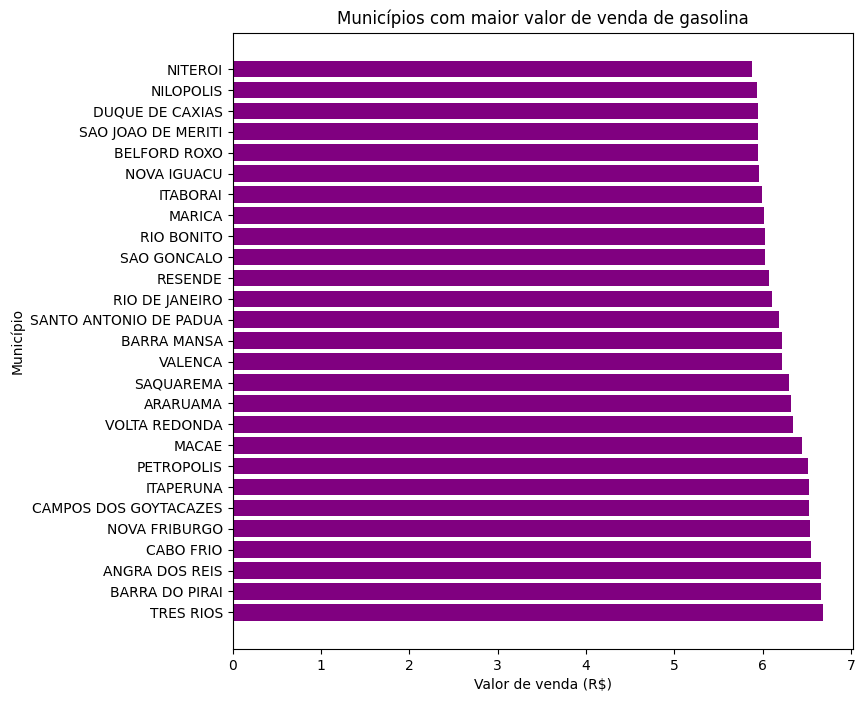

In [13]:
#Como não tem OUTLIER vou exibir os 5 maiores municípios

#Primeiro ordeno os valores
dfValorVendaPorMunicipio = dfValorVendaPorMunicipio.sort_values('Valor de Venda', ascending=False)

#Exibo o gráfico
plt.figure(figsize=(8,8))                           #Determina o tamanho do gráfico (X e Y, respectivamente)
plt.barh(dfValorVendaPorMunicipio['Municipio'], dfValorVendaPorMunicipio['Valor de Venda'], color='purple')
plt.title('Municípios com maior valor de venda de gasolina')
plt.xlabel('Valor de venda (R$)')
plt.ylabel('Município')
plt.grid(False)
plt.show()